In [38]:
import simplified_env as env
import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [39]:
starting_grid = np.array([0,1,0,0,0,0,0])
#starting_grid = np.array([1/7,1/7,1/7,1/7,1/7,1/7,1/7])
#starting_grid = np.array([1,0,0,0,0,0,0])


## Environment

In [40]:
environment = env.env(starting_grid=starting_grid)

Environment Ready.


In [41]:
display(environment.probability_matrix)

array([[0.6, 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.2, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0.9, 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0.4, 0.2, 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0.2, 0.4],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.6]])

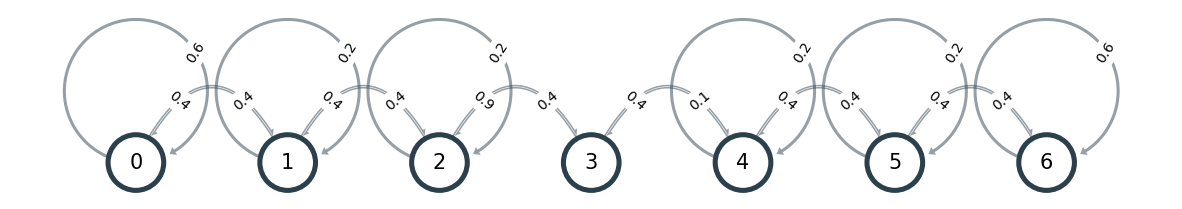

In [42]:
utils.visualize_environment(environment)

## Experiment

In [43]:
old_result = environment.starting_grid
result = np.matmul(environment.starting_grid, environment.probability_matrix)
vmin = 0
vmax = 1/6

results_series = [old_result,result]


for iter in range(0,1000):
    old_result = result
    result = np.matmul(result, environment.probability_matrix)

    results_series.append(result)

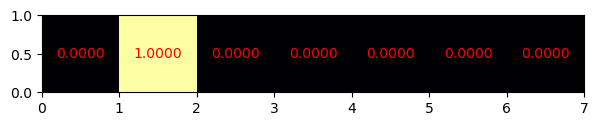

In [44]:
fig, ax = plt.subplots(figsize=(7,1))

log_norm = LogNorm(vmin=vmin, vmax=vmax)


def update(frame):
    cmap = plt.get_cmap('inferno')
    ax.clear()
    result = results_series[frame]
    normed_values = (result - np.min(result)) / (np.max(result) - np.min(result))

    for i in range(len(normed_values)):
        normed_values[i] = normed_values[i].round(4)

    for i, value in enumerate(result):
        plt.text(i + 0.5, 0.5, f'{value:.4f}', color='red', ha='center', va='center')

    ax.imshow(normed_values.reshape(1, -1), cmap=cmap, aspect='auto', extent=[0, len(result), 0, 1])

ani = FuncAnimation(fig, update, frames=len(results_series), interval=500, repeat=False)

HTML(ani.to_jshtml())

In [45]:
print(result)

[0.26470588 0.26470588 0.26470588 0.11764706 0.02941176 0.02941176
 0.02941176]


### Episode Sampling

In [46]:
episode = environment.sample_episode(100)    
print( episode )

[1, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 3, 2, 1, 0, 0, 0, 1, 2, 3, 2, 3, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 3, 2, 3]


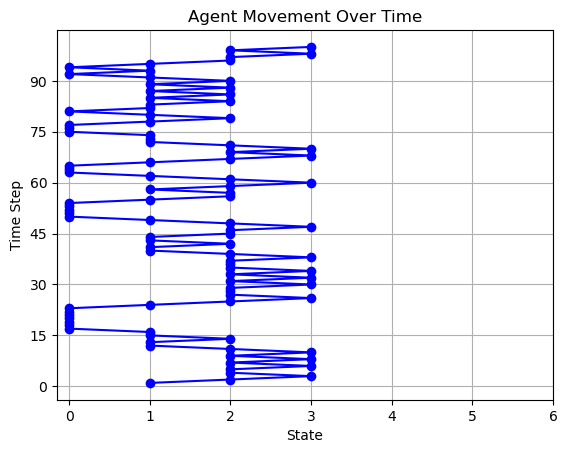

In [47]:
time_steps = range(1, len(episode) + 1)
plt.plot(episode, time_steps, marker='o', linestyle='-', color='b')

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 7, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

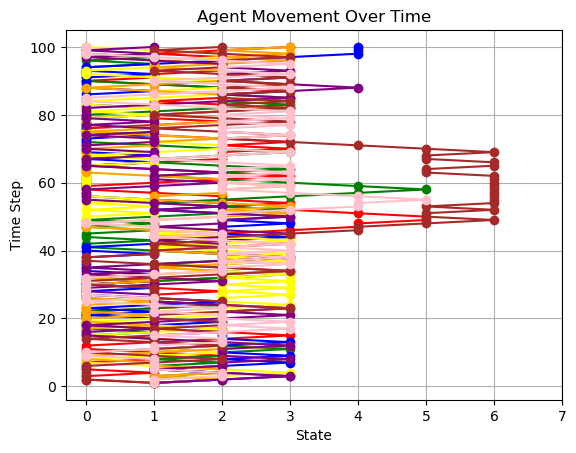

In [48]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

for i in range(len(colors)):
    episode = environment.sample_episode(100, random_first_state=True)  
    time_steps = range(1, len(episode) + 1)
    plt.plot(episode, time_steps, marker='o', linestyle='-', color=colors[i])

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 8, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Rewards

In [49]:
episode = environment.sample_episode(4, random_first_state=True) 

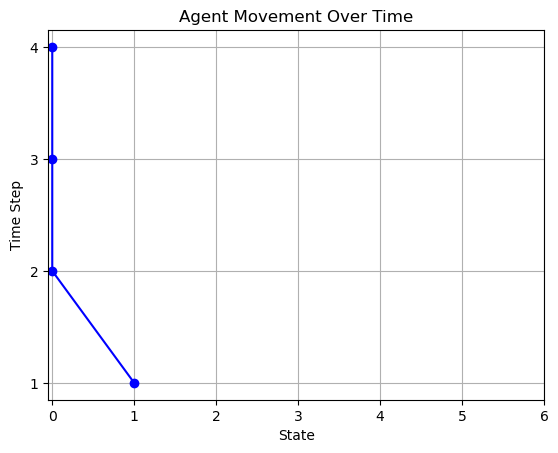

In [50]:
time_steps = range(1, len(episode) + 1)
plt.plot(episode, time_steps, marker='o', linestyle='-', color='b')

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 7, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [51]:
utils.return_function(episode, environment.rewards, environment.DISCOUNT_FACTOR)

0.875

In [52]:
environment.DISCOUNT_FACTOR

0.5

### Computing the value function

Estimated by simulation

In [53]:
returns = {}
returns_stepbystep = {}
for s in tqdm(environment.states):
    returns[s] = []
    environment.starting_state = s
    for i in range(10001):
        episode = environment.sample_episode(100)
        returns[s].append( utils.return_function(episode, environment.rewards, environment.DISCOUNT_FACTOR) )

100%|██████████| 7/7 [01:37<00:00, 14.00s/it]


In [54]:
for i in range(10001):
    returns_stepbystep[i] = np.linalg.norm( [np.mean(returns[s][:i]) for s in environment.states] )

/opt/anaconda3/envs/rl23/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/rl23/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [55]:
len( returns[1] )

10001

In [56]:
mean_returns = [np.mean(returns[s]) for s in environment.states]   
mean_returns

[1.540527122420631,
 0.3888911114942718,
 0.2029803539118672,
 0.48967422516633236,
 8.187931138574164,
 35.79011142121666,
 152.83525096280923]

In [57]:
np.linalg.norm(mean_returns)

157.19221886187748

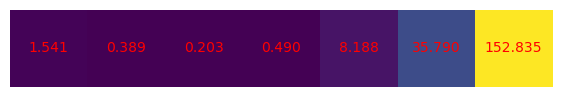

In [58]:
utils.plot_heatmap(mean_returns)

Bellman Equation

$V = (I - \gamma P)^{-1} R$

In [59]:
r = environment.rewards
r

[1, 0, 0, 0, 0, 0, 100]

In [60]:
environment.DISCOUNT_FACTOR

0.5

In [61]:
p = environment.probability_matrix
identity = np.identity(p.shape[0])

In [62]:
p

array([[0.6, 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.2, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0.9, 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0.4, 0.2, 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0.2, 0.4],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.6]])

In [63]:
identity

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [64]:
v = (np.linalg.inv(identity - environment.DISCOUNT_FACTOR * p) @ r)

In [65]:
v

array([  1.53862411,   0.38518439,   0.19470564,   0.49099099,
         8.06746906,  35.81261978, 153.08931994])

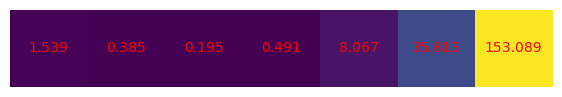

In [66]:
utils.plot_heatmap(v)

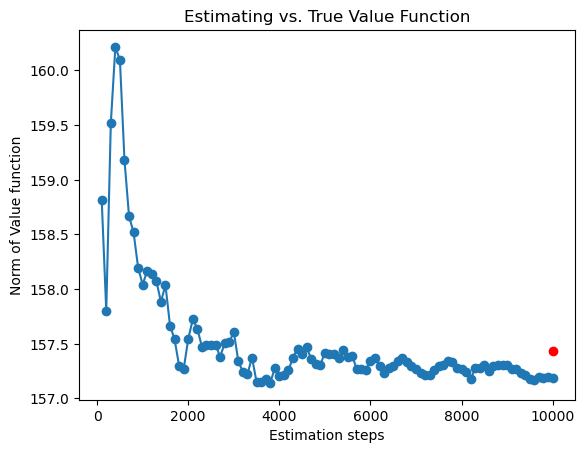

In [67]:
#plot lineplot of returns_stepbystep
# Extract keys and values
x_values = list(returns_stepbystep.keys())[::100]
y_values = list(returns_stepbystep.values())[::100]

plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('Estimation steps')
plt.ylabel('Norm of Value function')
plt.title('Estimating vs. True Value Function')
plt.plot(10000, np.linalg.norm(v), marker='o', linestyle='-', color='r')
plt.show()

Power Iteration

$V_k(s) = (R + \gamma P) V_{k-1}$

In [68]:
import sys
epsilon = sys.float_info.min

In [69]:
epsilon

2.2250738585072014e-308

In [70]:
v_pi = {}
v_pi[0] = [0] * len(r)
r = environment.rewards
p = environment.probability_matrix
gamma = environment.DISCOUNT_FACTOR

v_pi[0]

[0, 0, 0, 0, 0, 0, 0]

In [71]:
v_pi[1] = (r + gamma * p @ v_pi[0])
v_pi[1]

i = 1
while np.max(np.abs(v_pi[i] - v_pi[i-1])) > epsilon:
    v_pi[i+1] = (r + gamma * p @ v_pi[i])
    i += 1

In [72]:
i

59

In [73]:
v_pi[i]

array([  1.53862411,   0.38518439,   0.19470564,   0.49099099,
         8.06746906,  35.81261978, 153.08931994])

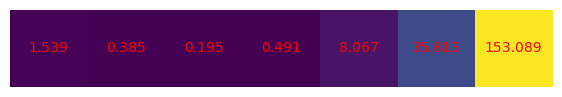

In [74]:
utils.plot_heatmap(v_pi[i])